# 변수중요도 : Feature Importance



## 1.환경준비

### 1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

### 2) 데이터 로딩

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


* 변수 설명
    * crim : 범죄율
    * zn : 대저택 비율
    * indus : 산업단지 비율
    * chas : 찰스 강변 여부
    * nox : 일산화질소 농도(공기오염도)
    * rm : 평균 주택당 방 수
    * age : 30년 이상된 주택 비율
    * dis : 주요 업무 지역 접근성 지수
    * rad : 고속도로 접근성 지수
    * tax  1만 달러당 재산세
    * ptratio : 교사 1명당 학생수
    * lstat : 하위계층 비율
    * black : 흑인비율(원래 숫자를 변형한 것임)
    * mdev : 타운별 집값 중위수(단위 : 1000달러)

### 3) 필요한 함수 생성

In [ ]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

## 2.데이터 준비


### 1) x, y로 나누기 

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

### 2) 가변수화

### 3) train : validation 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 2022)
x_train.shape

(404, 13)

## 3.Feature Importance

### 1) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import * 

* 기본 모델

In [ ]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

* 모델 시각화

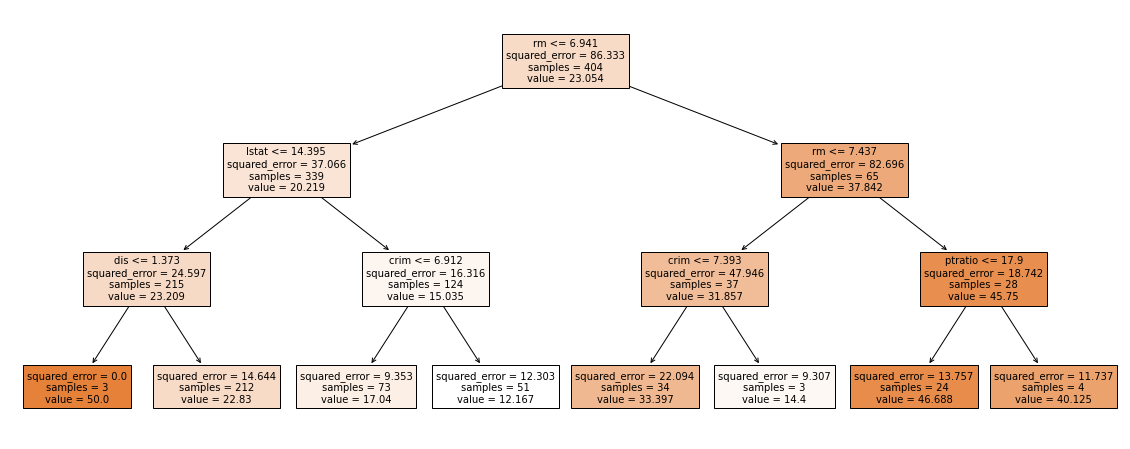

In [ ]:
plt.figure(figsize = (20, 8))
plot_tree(model, feature_names = x.columns,
          filled = True, fontsize = 10);

* 변수 중요도

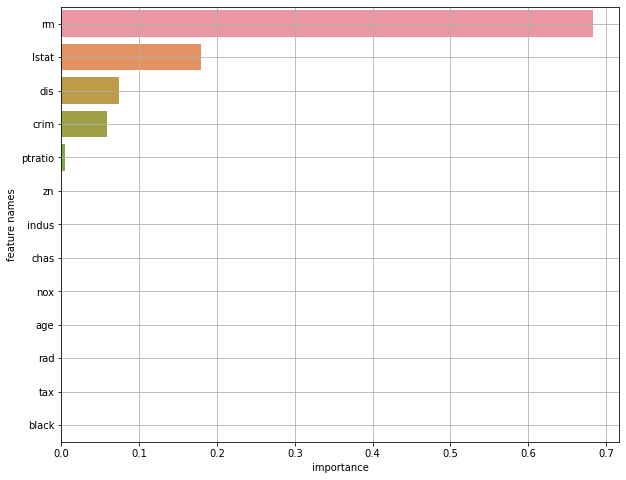

In [ ]:
result = plot_feature_importance(model.feature_importances_, list(x))

In [ ]:
result

,feature_names,feature_importance
0,rm,0.682914
1,lstat,0.179261
2,dis,0.074513
3,crim,0.058274
4,ptratio,0.005038
5,zn,0.000000
6,indus,0.000000
7,chas,0.000000
8,nox,0.000000
9,age,0.000000


* 성능 최적화 이후 변수 중요도 다시 확인

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':range(1, 10)}
model = DecisionTreeRegressor()
model_gs = GridSearchCV(model, params, cv = 5)
model_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10)})

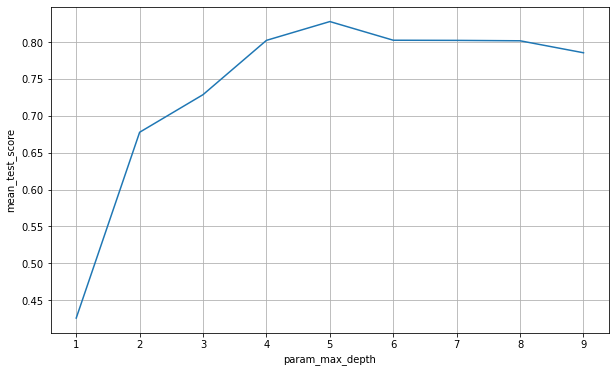

In [ ]:
# 튜닝 과정 로그를 df로 저장
result = pd.DataFrame(model_gs.cv_results_)

plt.figure(figsize = (10,6))
sns.lineplot(x='param_max_depth', y='mean_test_score', data = result)
plt.grid()
plt.show()

In [ ]:
best_model = model_gs.best_estimator_

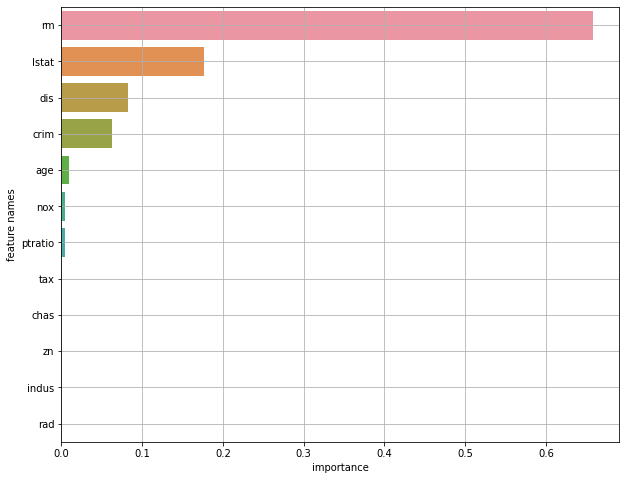

In [ ]:
result = plot_feature_importance(best_model.feature_importances_, list(x),12)

In [ ]:
# pred = model_gs.predict(x_val)
pred = best_model.predict(x_val)
print(mean_absolute_error(y_val, pred))

3.1109920566467055


### 2) Random Forest

* 기본모델링

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
n_est = 3
model = RandomForestRegressor(n_estimators = n_est, max_depth = 2)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=3)

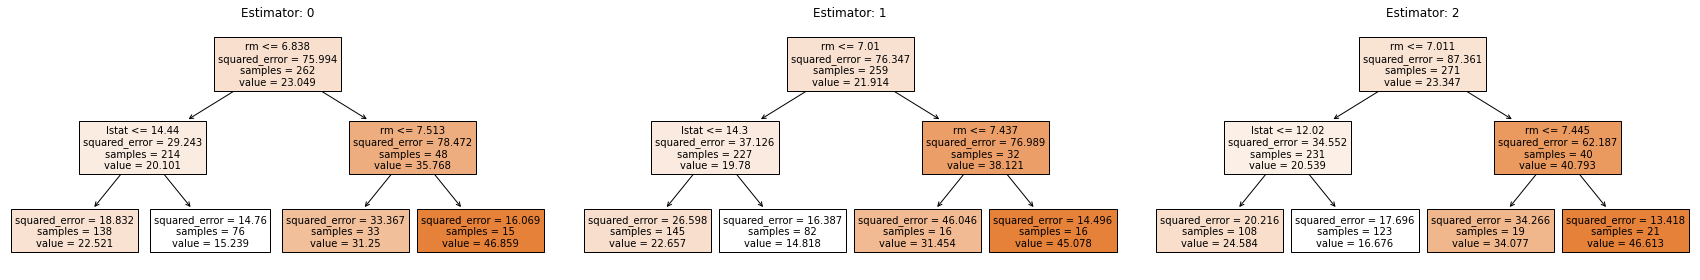

In [ ]:
fn=list(x_train)
cn=["0","1"]
fig, axes = plt.subplots(nrows = 1,ncols = n_est,figsize = (24,4))
for index in range(0, n_est):
    plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True, fontsize = 10,
                   ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 12)
    
plt.tight_layout()
plt.show()

In [ ]:
fi = x_train.iloc[0:0]
for i in range(n_est) :
    fi.loc[i] = model.estimators_[i].feature_importances_

In [ ]:
fi

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.0,0.0,0.0,0.0,0.0,0.830853,0.0,0.0,0.0,0.0,0.0,0.0,0.169147
1,0.0,0.0,0.0,0.0,0.0,0.760153,0.0,0.0,0.0,0.0,0.0,0.0,0.239847
2,0.0,0.0,0.0,0.0,0.0,0.801654,0.0,0.0,0.0,0.0,0.0,0.0,0.198346


In [ ]:
fi.mean(axis = 0)

crim       0.000000
zn         0.000000
indus      0.000000
chas       0.000000
nox        0.000000
rm         0.797553
age        0.000000
dis        0.000000
rad        0.000000
tax        0.000000
ptratio    0.000000
black      0.000000
lstat      0.202447
dtype: float64

In [ ]:
fi_rf = {}

for i, v in enumerate(list(x)) :
    fi_rf[v] = model.feature_importances_[i]

pd.DataFrame(fi_rf, index = [0])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.0,0.0,0.0,0.0,0.0,0.797553,0.0,0.0,0.0,0.0,0.0,0.0,0.202447


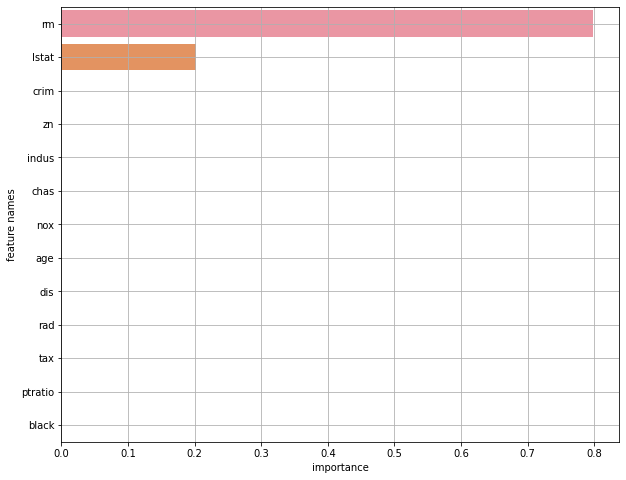

In [ ]:
result = plot_feature_importance(model.feature_importances_, list(x))

* tree = 100개 Random Forest 모델 만들기

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

* 트리 전체 중요도 저장

In [ ]:
fi = x_train.iloc[0:0]
for i in range(100) :
    fi.loc[i] = model.estimators_[i].feature_importances_

In [ ]:
fi

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.102853,0.002015,0.012002,0.000332,0.004332,0.592699,0.028386,0.011816,0.005437,0.005070,0.010166,0.012515,0.212376
1,0.038771,0.000555,0.002946,0.000829,0.006148,0.584989,0.021179,0.105568,0.001290,0.020281,0.026720,0.006879,0.183845
2,0.072694,0.000342,0.014916,0.001141,0.001459,0.619693,0.005952,0.100624,0.001334,0.004939,0.007000,0.006826,0.163079
3,0.043756,0.000664,0.002158,0.001205,0.005291,0.611711,0.011584,0.082136,0.004580,0.003052,0.021142,0.006870,0.205851
4,0.016475,0.000290,0.004937,0.001153,0.018691,0.621250,0.013370,0.138956,0.000149,0.015197,0.014057,0.003795,0.151680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.047432,0.001348,0.005046,0.001562,0.011295,0.611424,0.012388,0.072343,0.001011,0.002627,0.004242,0.011450,0.217833
96,0.019130,0.000898,0.002934,0.001644,0.017143,0.270275,0.013869,0.148521,0.000049,0.001559,0.017227,0.009778,0.496973
97,0.027414,0.001426,0.013969,0.008548,0.015407,0.606637,0.028291,0.028203,0.003131,0.004609,0.022501,0.008254,0.231611
98,0.037295,0.000621,0.003287,0.000287,0.009086,0.149762,0.008442,0.144569,0.000010,0.001239,0.005633,0.014841,0.624929


* 트리 100개의 평균 중요도

In [ ]:
fi.mean(axis = 0)

crim       0.030039
zn         0.000889
indus      0.005534
chas       0.000915
nox        0.016915
rm         0.492122
age        0.013331
dis        0.072466
rad        0.003040
tax        0.009657
ptratio    0.011588
black      0.010157
lstat      0.333348
dtype: float64

In [ ]:
for i, v in enumerate(list(x)) :
    fi_rf[v] = model.feature_importances_[i]

pd.DataFrame(fi_rf, index = [0])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.030039,0.000889,0.005534,0.000915,0.016915,0.492122,0.013331,0.072466,0.00304,0.009657,0.011588,0.010157,0.333348


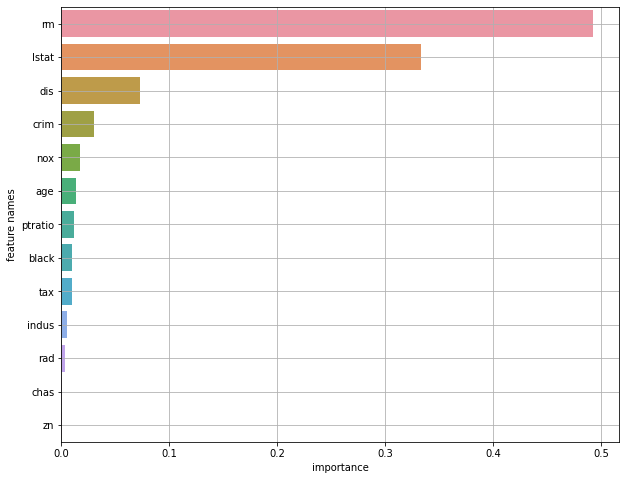

In [ ]:
result = plot_feature_importance(model.feature_importances_, list(x))

In [ ]:
pred = model.predict(x_val)
print(mean_absolute_error(y_val, pred))

2.4235294117647044


### 3) XGB

In [ ]:
from xgboost import XGBRegressor, plot_tree, plot_importance

* 기본 모델링

In [ ]:
model = XGBRegressor(n_estimators = 10, max_depth = 2, objective='reg:squarederror')
model.fit(x_train, y_train)

XGBRegressor(max_depth=2, n_estimators=10, objective='reg:squarederror')

* plot tree
    * plot tree함수는 XGB에서 제공합니다.
    * XGB에서의 트리 시각화는 여러 estimator중 하나씩만 가능합니다.

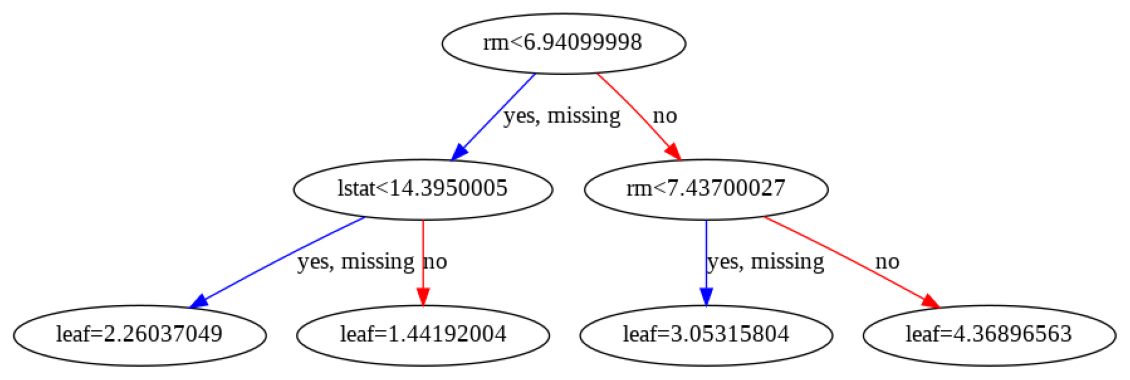

In [ ]:
plt.rcParams['figure.figsize'] = 20,20
plot_tree(model)
plt.show()

* leaf 노드의 값 ==> 로지스틱 함수에 넣으면 0~1 사이의 값으로 변환됨.

* 몇가지 옵션
    * num_trees = 0
    * rankdir='LR'

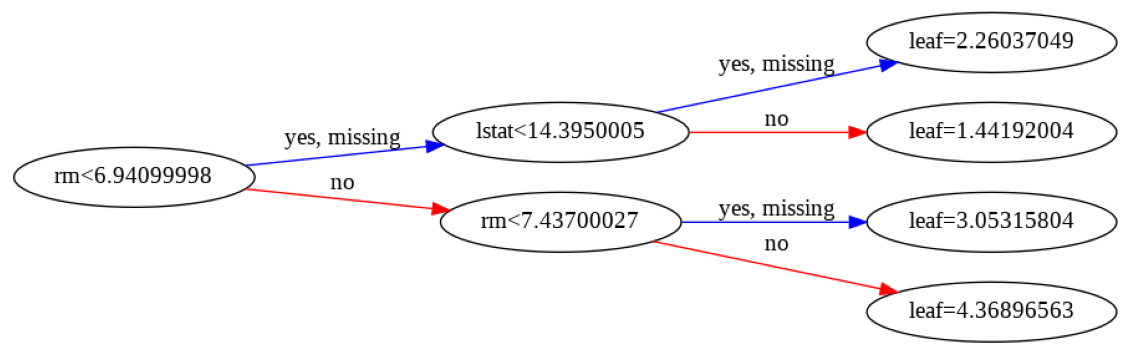

In [ ]:
plot_tree(model, num_trees = 0, rankdir = 'LR')
plt.show()

* plot_importance
    * 변수중요도 기본값은 weight

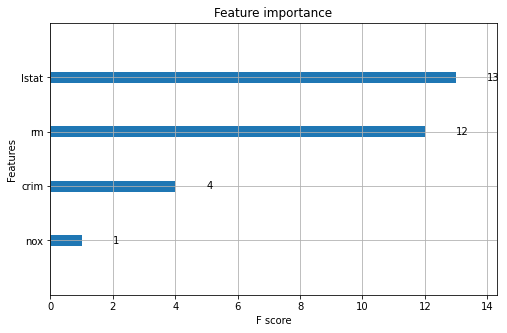

In [ ]:
plt.rcParams['figure.figsize'] = 8, 5
plot_importance(model)
plt.show()

* model.feature_importances_ : 변수중요도 기본값은 gain.

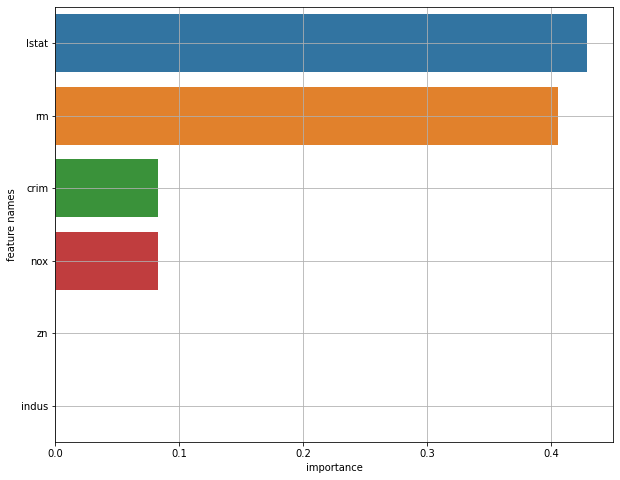

In [ ]:
result = plot_feature_importance(model.feature_importances_, list(x),6)

* xgb의 변수 중요도
    * weight : 모델 전체에서 해당 feature가 split될 때 사용된 횟수의 합(plot_tree 에서의 기본값)
    * gain : feature별 평균 imformation gain.(model.feature_importances_ 의 기본값)
    * cover : feature가 split 할때의 샘플 수의 평균.

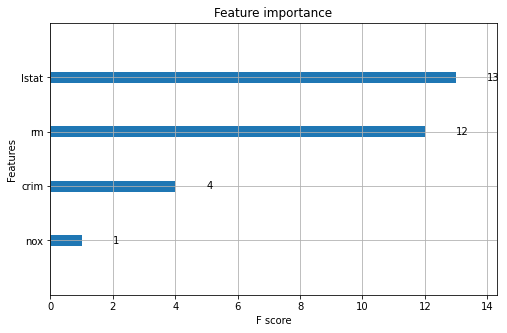

In [ ]:
# importance_type='weight'
plot_importance(model)
plt.show()

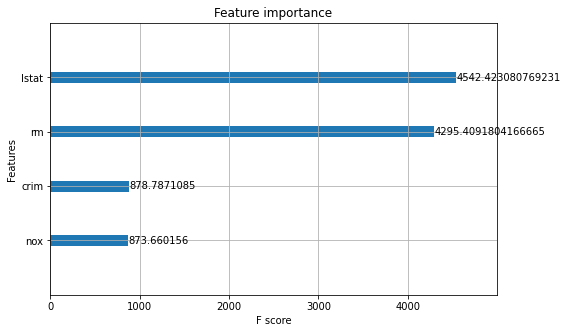

In [ ]:
# importance_type='gain'
plot_importance(model, importance_type='gain')
plt.show()

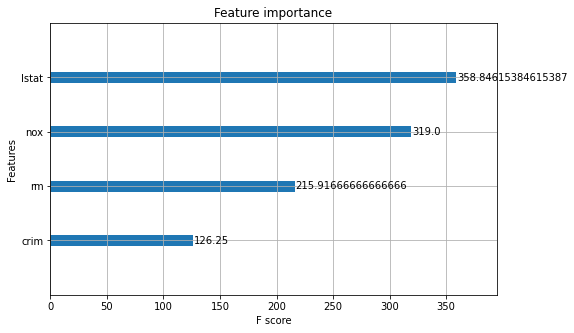

In [ ]:
# importance_type='cover'
plot_importance(model, importance_type='cover')
plt.show()

## 4.실습 : 직원 이직 예측모델 변수 중요도 비교

### 4.1 데이터 준비

* 데이터 로딩

In [ ]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition2.csv"
data = pd.read_csv(path)
data.head(10)

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1
5,0,44,Research & Development,2,1,Medical,Male,Manufacturing Director,3,Single,10209,5,2,16,2,2,2
6,0,41,Sales,10,2,Life Sciences,Male,Sales Executive,4,Single,6230,7,4,16,3,3,14
7,0,25,Sales,18,1,Life Sciences,Male,Sales Executive,3,Married,6232,2,2,6,3,2,3
8,0,50,Research & Development,2,3,Medical,Male,Research Director,3,Married,17639,5,4,30,3,3,4
9,0,47,Sales,4,2,Life Sciences,Female,Sales Executive,4,Single,4163,1,3,9,0,3,9


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


In [ ]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [ ]:
y.value_counts() / y.shape[0]

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

* 가변수화 Dummy Variable

In [ ]:
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance'] 
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True) 

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 2022)

In [ ]:
print(x_train.shape, x_val.shape)

(920, 38) (230, 38)


* class balance를 맞추기 위한 resampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

print(np.bincount(y_train))
print(np.bincount(y_train) / y_train.shape[0])

[833 833]
[0.5 0.5]


### 4.2 모델링 with Resampling
> * Resampling(up) 샘플링 데이터를 이용
* DecisionTreeClassifier, RandomForestClassifier, XGBClassifier를 이용하여 모델 생성
* validate set으로 예측하고 평가(classification report)해 봅시다.
* 각각의 변수중요도 비교하기.



* 모델링
    * DecisionTreeClassifier, RandomForestClassifier, XGBClassifier를 이용하여 모델 생성

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

* decision tree

In [ ]:
# depth의 범위 1~10까지 안에서 그리드서치로 튜닝해 봅시다.
DT_params = {'max_depth':range(1, 10)}
DT_model = DecisionTreeClassifier()
DT_model_gs = GridSearchCV(DT_model, DT_params, cv = 5)

DT_model_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)})

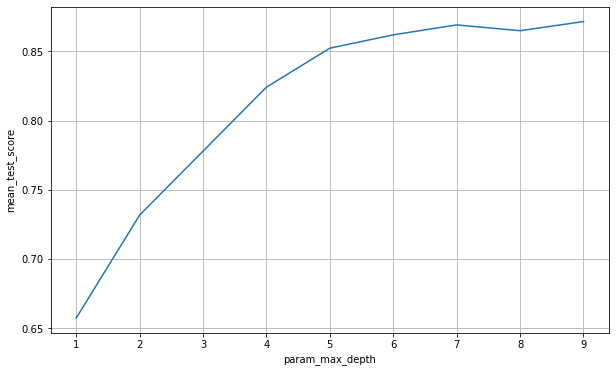

In [ ]:
# 튜닝 과정 로그를 df로 저장
result = pd.DataFrame(DT_model_gs.cv_results_)

plt.figure(figsize = (10,6))
sns.lineplot(x='param_max_depth', y='mean_test_score', data = result)
plt.grid()
plt.show()

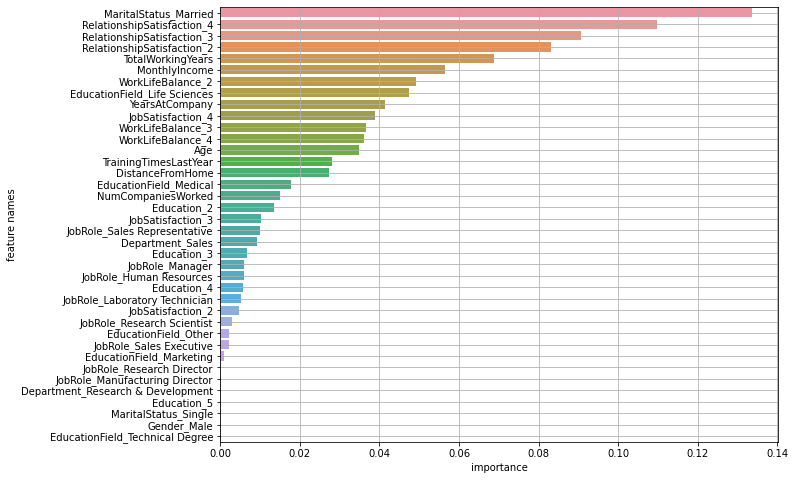

In [ ]:
# 튜닝 결과를 그래프로 그려봅시다.
best_model = DT_model_gs.best_estimator_
result = plot_feature_importance(best_model.feature_importances_, list(x))

* rf

In [ ]:
# 기본값으로 모델을 생성합니다.
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
fi = x_train.iloc[0:0]
for i in range(len(RF_model.estimators_)) :
    fi.loc[i] = RF_model.estimators_[i].feature_importances_
fi

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,Education_2,Education_3,Education_4,...,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.052111,0.050249,0.050994,0.029933,0.128365,0.034294,0.020410,0.052615,0.074400,0.059350,...,0.024624,0.012379,0.039074,0.009992,0.038168,0.023220,0.063043,0.062276,0.026904,0.002111
1,0.074174,0.029370,0.088229,0.047220,0.020290,0.021783,0.049956,0.013820,0.013915,0.029234,...,0.008640,0.014561,0.012701,0.007998,0.014194,0.011260,0.044591,0.001334,0.011026,0.004572
2,0.033660,0.043543,0.052578,0.019280,0.039742,0.028291,0.060584,0.023622,0.026879,0.038684,...,0.006382,0.090492,0.068178,0.011588,0.014649,0.017356,0.107792,0.027207,0.077582,0.006921
3,0.034178,0.041659,0.057540,0.027861,0.093527,0.054663,0.047303,0.007371,0.005635,0.018608,...,0.011473,0.031917,0.114006,0.007703,0.022290,0.048580,0.110812,0.000209,0.015426,0.015045
4,0.101127,0.047034,0.090122,0.030208,0.046201,0.050905,0.051700,0.000000,0.023277,0.000171,...,0.028807,0.035405,0.128718,0.038196,0.010645,0.062095,0.010457,0.014743,0.015830,0.000859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.062024,0.077918,0.103680,0.054264,0.028464,0.026761,0.031912,0.008949,0.039561,0.022587,...,0.008473,0.087263,0.059149,0.007546,0.007292,0.052984,0.066224,0.024167,0.023594,0.010256
96,0.031398,0.031797,0.175688,0.018399,0.069904,0.036078,0.033013,0.002247,0.029258,0.000515,...,0.062043,0.103309,0.023893,0.007125,0.012097,0.017991,0.015469,0.004222,0.011687,0.004911
97,0.022456,0.040425,0.114178,0.066182,0.024335,0.050933,0.061200,0.015299,0.006420,0.024732,...,0.002998,0.073546,0.039347,0.006456,0.021116,0.072899,0.088106,0.018848,0.009556,0.015257
98,0.035137,0.023400,0.067531,0.028914,0.119319,0.026323,0.040876,0.008052,0.007877,0.016479,...,0.009762,0.010240,0.043652,0.019074,0.020587,0.114571,0.108953,0.007539,0.022832,0.000659


In [ ]:
fi.mean(axis = 0)

Age                                  0.058125
DistanceFromHome                     0.038296
MonthlyIncome                        0.092141
NumCompaniesWorked                   0.030460
TotalWorkingYears                    0.047584
TrainingTimesLastYear                0.040224
YearsAtCompany                       0.041896
Education_2                          0.012769
Education_3                          0.023167
Education_4                          0.021836
Education_5                          0.002339
Department_Research & Development    0.055539
Department_Sales                     0.021928
EducationField_Life Sciences         0.036012
EducationField_Marketing             0.008261
EducationField_Medical               0.031188
EducationField_Other                 0.003418
EducationField_Technical Degree      0.007317
Gender_Male                          0.016581
JobRole_Human Resources              0.007788
JobRole_Laboratory Technician        0.006642
JobRole_Manager                   

In [ ]:
fi_rf = {}

for i, v in enumerate(list(x)) :
    fi_rf[v] = RF_model.feature_importances_[i]

pd.DataFrame(fi_rf, index = [0])

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,Education_2,Education_3,Education_4,...,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.058125,0.038296,0.092141,0.03046,0.047584,0.040224,0.041896,0.012769,0.023167,0.021836,...,0.018031,0.043506,0.057914,0.008839,0.017526,0.031795,0.049288,0.043395,0.050436,0.013466


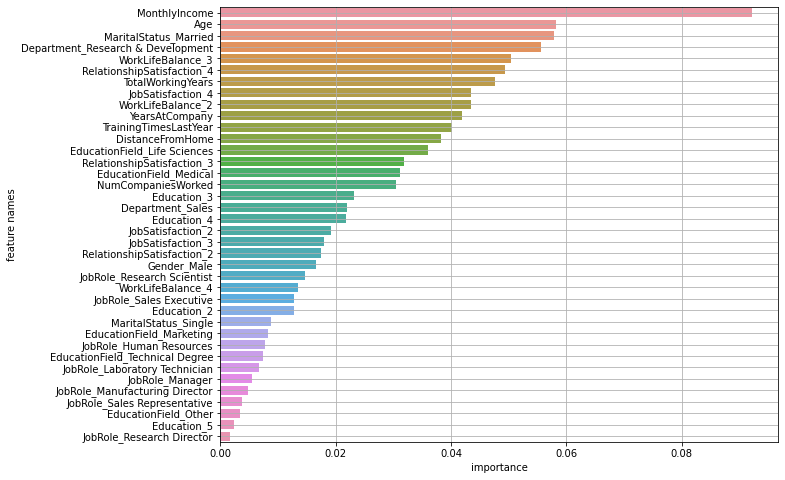

In [ ]:
result = plot_feature_importance(RF_model.feature_importances_, list(x))

* xgb

In [ ]:
# 다음 범위로 그리드서치 튜닝을 진행합시다.
# max_depth : 1~6, learning_rate : 0.01 ~ 0.4, n_estimators : 50~150
xgb_params = {'max_depth' : range(1,7), 'learning_rate' : np.linspace(0.01, 0.4, 40), 'n_estimators' : range(50, 151, 10)}
XGB_model = XGBClassifier()
XGB_model_gs = GridSearchCV(XGB_model, xgb_params, cv=5)
XGB_model_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]),
                         'max_depth': range(1, 7),
                         'n_estimators': range(50, 151, 10)})

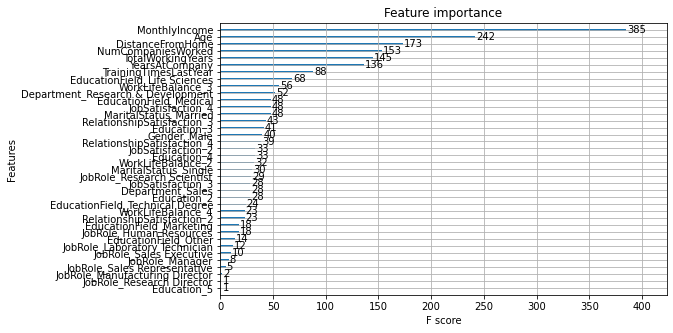

In [ ]:
# importance_type='weight'
plot_importance(XGB_model_gs.best_estimator_)
plt.show()

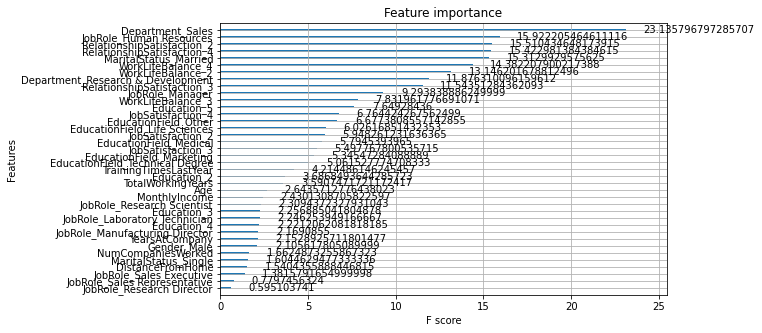

In [ ]:
# importance_type='gain'
plot_importance(XGB_model_gs.best_estimator_, importance_type='gain')
plt.show()

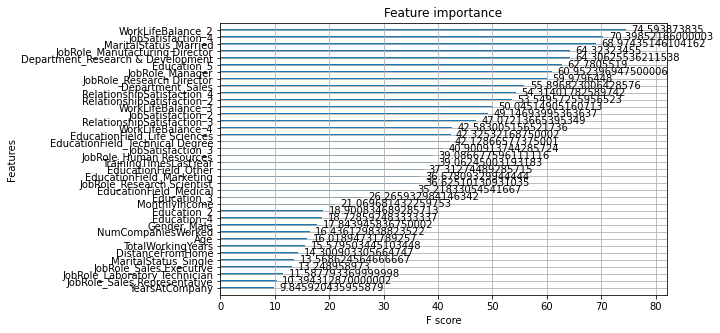

In [ ]:
# importance_type='cover'
plot_importance(XGB_model_gs.best_estimator_, importance_type='cover')
plt.show()

* 모델 성능 비교
    * 세 모델 중 성능이 가장 좋은 모델은?

In [ ]:
DT_pred = DT_model_gs.predict(x_val)
RF_pred = RF_model.predict(x_val)
XGB_pred = XGB_model_gs.predict(x_val)

In [ ]:
print(classification_report(y_val, DT_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       217
           1       0.10      0.23      0.14        13

    accuracy                           0.83       230
   macro avg       0.52      0.55      0.52       230
weighted avg       0.90      0.83      0.87       230



In [ ]:
print(classification_report(y_val, RF_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       217
           1       0.36      0.31      0.33        13

    accuracy                           0.93       230
   macro avg       0.66      0.64      0.65       230
weighted avg       0.93      0.93      0.93       230



In [ ]:
print(classification_report(y_val, XGB_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       217
           1       0.36      0.31      0.33        13

    accuracy                           0.93       230
   macro avg       0.66      0.64      0.65       230
weighted avg       0.93      0.93      0.93       230



* 변수 중요도 비교 : 세 모델간 변수 중요도를 비교해 봅시다. 

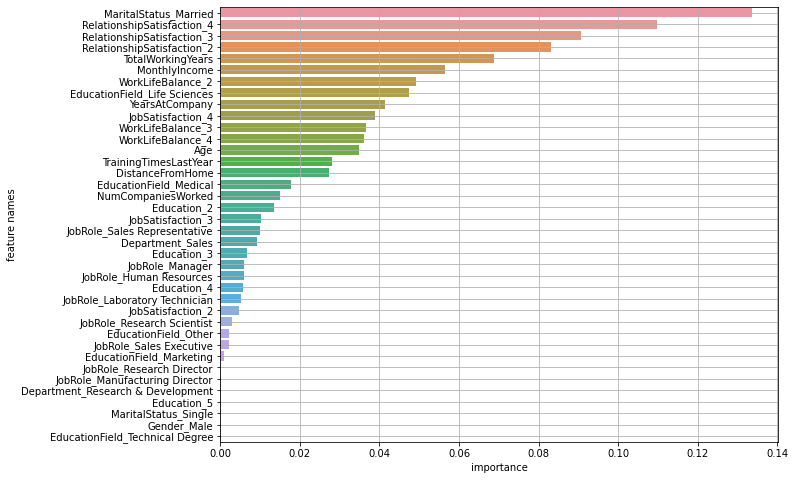

In [ ]:
result = plot_feature_importance(DT_model_gs.best_estimator_.feature_importances_, list(x))

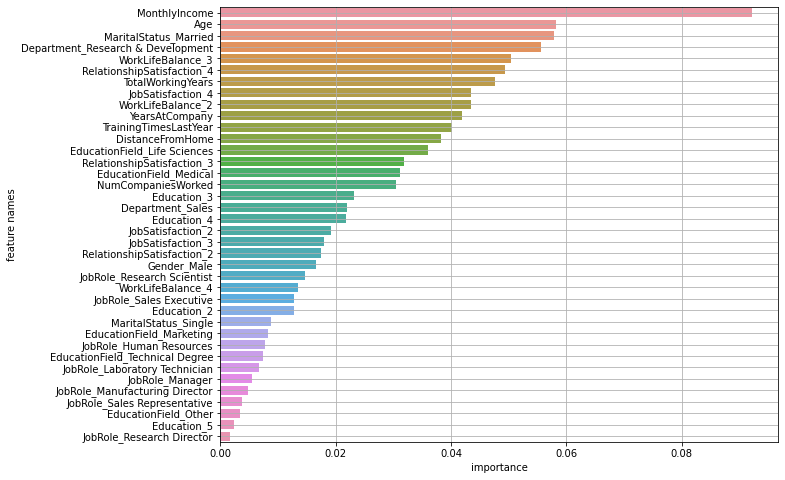

In [ ]:
result2 = plot_feature_importance(RF_model.feature_importances_, list(x))

In [ ]:
result3 = plot_feature_importance(XGB_model_gs.best_estimator_.feature_importances_, list(x))

* 변수 중요도의 차이를 통해 무엇을 파악할 수 있나요?

______
